## Convolutional Neural Network

**Project description**
- **Goal**: Create a deep learning model (CNN) which can classify wether an image is either a cat or a dog.
- **Dataset**: Two folders (Training and Testing) of images. Each folder has images of cats and dogs. 

#### Importing Libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Part 1 - Data Preprocessing

#### Training Set

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    directory= r'dataset/training_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


#### Test Set

In [5]:
test_datagen = ImageDataGenerator(rescale=1.255)
test_set = test_datagen.flow_from_directory(
    directory= r'dataset/test_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


### Part 2 - Building the CNN

In [6]:
cnn = tf.keras.Sequential([
    # First convolution layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # Second convolution layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # Connect layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),

    # Binary activation needed for cat/dog classification
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

### Part 3 - Training the CNN

#### Compiling the CNN

In [7]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### CNN Model Training with Validation

In [9]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 21s 85ms/step - loss: 0.5514 - accuracy: 0.7156 - val_loss: 66.7573 - val_accuracy: 0.7180
Epoch 2/25
250/250 [==============================] - 21s 85ms/step - loss: 0.5275 - accuracy: 0.7352 - val_loss: 91.4902 - val_accuracy: 0.6995
Epoch 3/25
250/250 [==============================] - 21s 84ms/step - loss: 0.5053 - accuracy: 0.7475 - val_loss: 115.2938 - val_accuracy: 0.6400
Epoch 4/25
250/250 [==============================] - 21s 85ms/step - loss: 0.4788 - accuracy: 0.7684 - val_loss: 99.6853 - val_accuracy: 0.6910
Epoch 5/25
250/250 [==============================] - 21s 84ms/step - loss: 0.4676 - accuracy: 0.7751 - val_loss: 102.9345 - val_accuracy: 0.6875
Epoch 6/25
250/250 [==============================] - 21s 85ms/step - loss: 0.4521 - accuracy: 0.7804 - val_loss: 91.8012 - val_accuracy: 0.7180
Epoch 7/25
250/250 [==============================] - 21s 85ms/step - loss: 0.4358 - accuracy: 0.7935 - val_loss: 142.1120 - val

Save model as it takes a while to train...

In [10]:
cnn.save('cnn.keras')

Load Model if needed...

In [ ]:
# cnn = tf.keras.models.load_model('cnn.keras')
# cnn.model_summary()

#### Plotting Model History

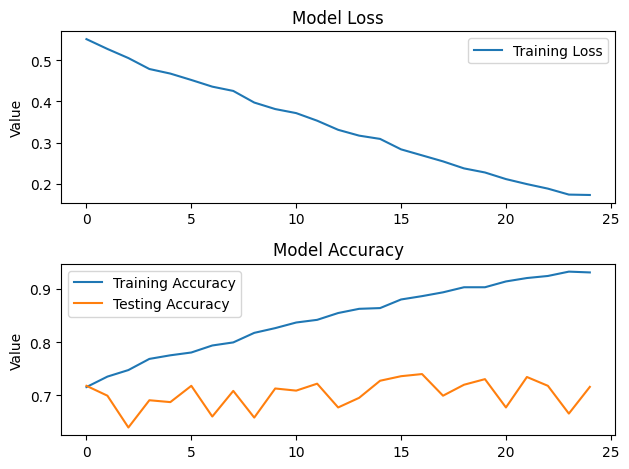

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(history.history['loss'], label='Training Loss')
#axes[0].plot(history.history['val_loss'], label='Value Loss')
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Value')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Testing Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Value')
axes[1].legend()

plt.tight_layout()


### Part 4 - Making a single prediction

1/1 [==============================] - 0s 16ms/step
The model predicts: dog


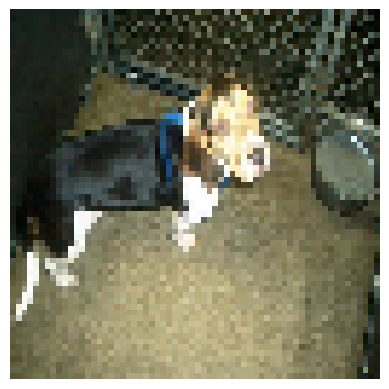

In [14]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(path='dataset/single_prediction/cat_or_dog_4.jpg', target_size=(64, 64))

%matplotlib inline
plt.imshow(test_image)
plt.axis("off")

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(x=test_image/255.0)
training_set.class_indices

if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(f"The model predicts: {prediction}")